In [1]:
import os

# importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.utils import to_categorical
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay) 
from keras.metrics import accuracy
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 


# Loading or readind the csv dataset

In [3]:
df= pd.read_csv('car data.csv')

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.rename(columns = {'Car_Name':'Make', 'Year': 'model_Year', 'Selling_Price': 'Initial_price(£)', 
                     'Present_Price':'Current_Price(£)', 'Driven_kms': 'Speedometer','Fuel_Type':'fuel_Type',
                  'Selling_type':'Seller', 'Transmission':'transmission'}, inplace = True)

df.head()

,Make,model_Year,Initial_price(£),Current_Price(£),Speedometer,fuel_Type,Seller,transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              301 non-null    object 
 1   model_Year        301 non-null    int64  
 2   Initial_price(£)  301 non-null    float64
 3   Current_Price(£)  301 non-null    float64
 4   Speedometer       301 non-null    int64  
 5   fuel_Type         301 non-null    object 
 6   Seller            301 non-null    object 
 7   transmission      301 non-null    object 
 8   Owner             301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
df.columns

Index(['Make', 'model_Year', 'Initial_price(£)', 'Current_Price(£)',
       'Speedometer', 'fuel_Type', 'Seller', 'transmission', 'Owner'],
      dtype='object')

No NaN or missing value found in the dataset

In [12]:
df['Make'].nunique()

98

In [13]:
df['Make'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [14]:
df['model_Year'].nunique()

16

In [15]:
df['model_Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [16]:
df['Initial_price(£)'].nunique()

156

In [17]:
df['Initial_price(£)'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [18]:
df['Current_Price(£)'].nunique()

148

In [19]:
df['Current_Price(£)'].unique()

array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [20]:
df['Speedometer'].nunique()

206

In [21]:
df['Speedometer'].unique()

array([ 27000,  43000,   6900,   5200,  42450,   2071,  18796,  33429,
        20273,  42367,   2135,  51000,  15000,  26000,  77427,  41678,
        35500,  41442,  25000,   2400,  50000,  45280,  56879,  20000,
        55138,  16200,  44542,  45000,  51439,  54200,  39000,  49998,
        48767, 127000,  10079,  62000,  24524,  46706,  58000,  45780,
        64532,  65000,  25870,  37000, 104707,  40000, 135000,  90000,
        70000,  40534,  39485,  41000,  40001,  40588,  78000,  47000,
         6000,  11000,  59000,  88000,  12000,  71000,  56001,  83000,
        36000,  72000, 135154,  80000,  89000,  23000,  38000, 197176,
       142000,  56000,  58242,  75000,  29000,   8700,  50024,   3000,
         1400,   4000,   1200,   4100,  21700,  16500,  18000,   7000,
        35000,  17000,  17500,  33000,  14000,   5400,   5700,  46500,
        11500,   1300,   5000,   3500,    500,  11800,  23500,  16000,
        16600,  32000,  19000,  24000,  31000,  13000,   8000,   4300,
      

In [22]:
df['fuel_Type'].nunique()

3

In [23]:
df['fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [24]:
df['Seller'].nunique()

2

In [25]:
df['Seller'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [26]:
df['transmission'].nunique()

2

In [27]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
df['Owner'].nunique()

3

In [29]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

# checking for distribution:

<Figure size 128x96 with 0 Axes>

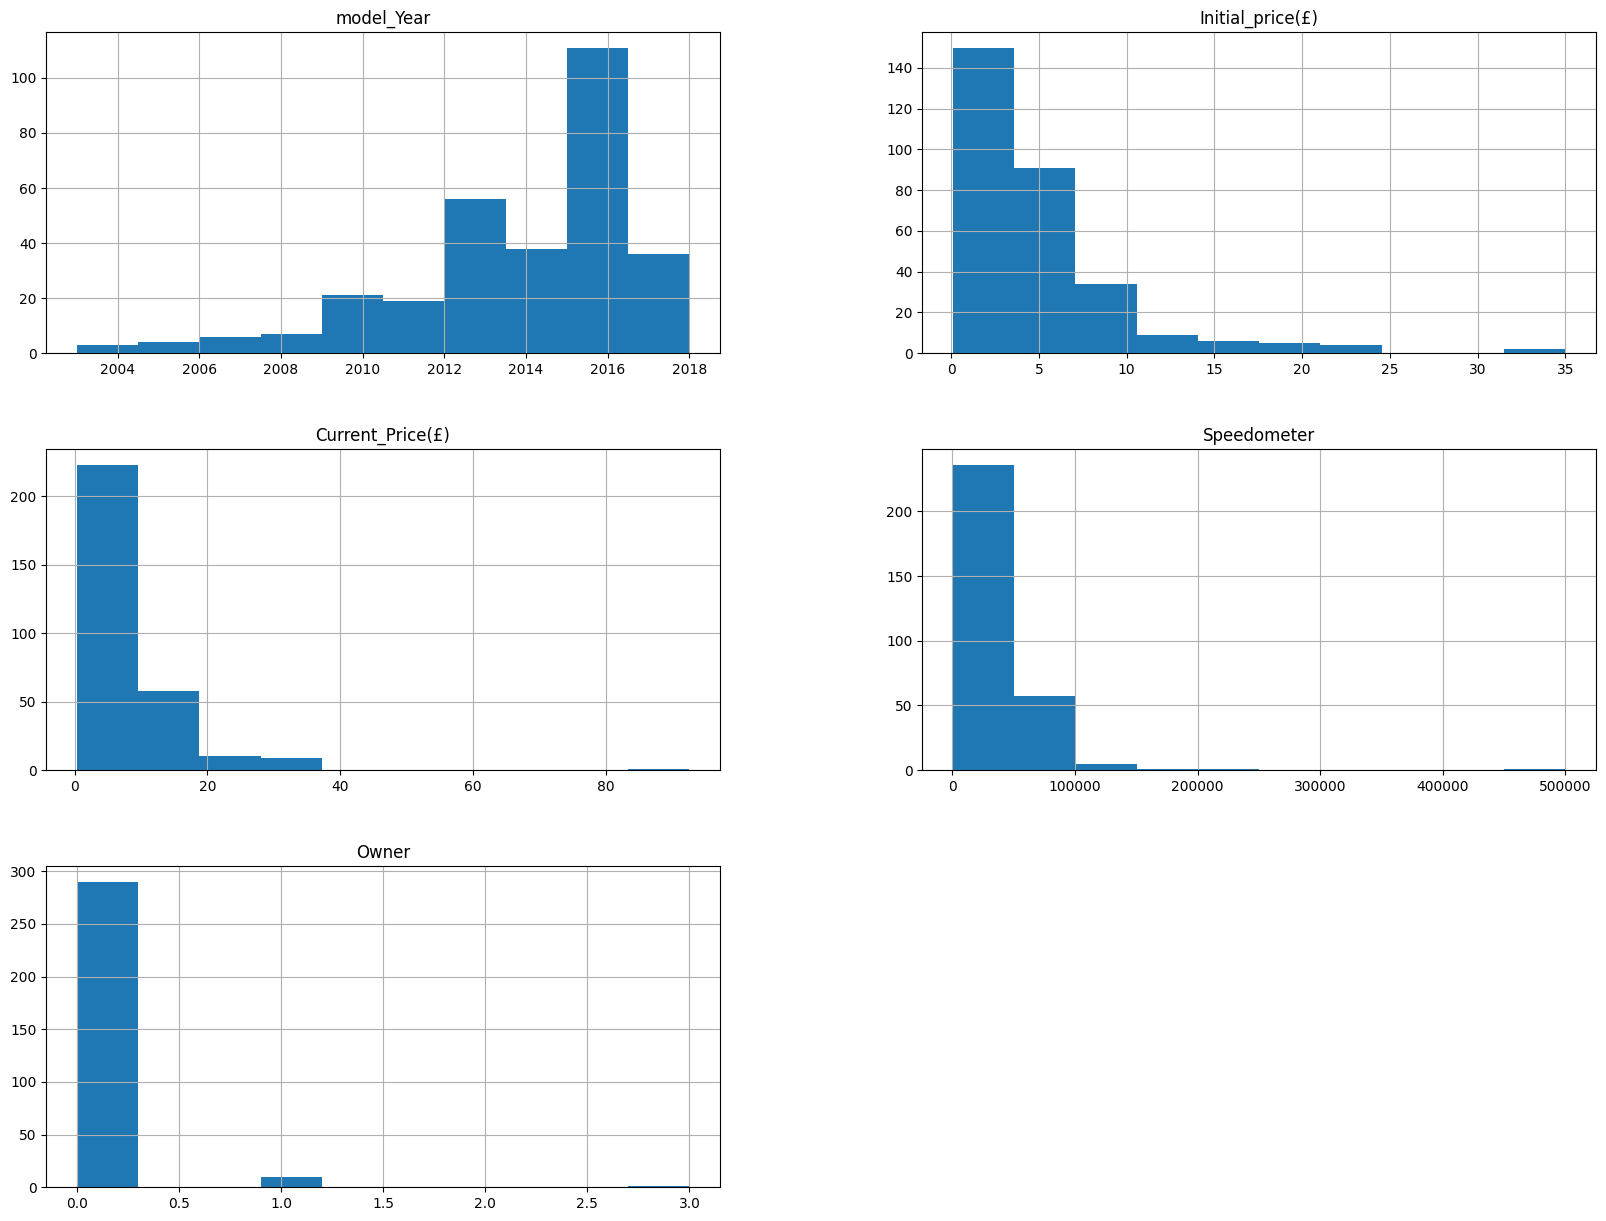

In [30]:
plt.figure(dpi=20)
df.hist(figsize = (20,15))
plt.show()


Distribution for model_year appears to be left-skewed, initial_price and curent_price are right-skewed. This can also be 

confirmed by observing the mean and median of the distributions

In [31]:
df.describe(include= "all").transpose() # printing the basic statistics of the dataset 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_Year,301.0,NaN,NaN,NaN,2013.627907,2.891554,2003.0,2012.0,2014.0,2016.0,2018.0
Initial_price(£),301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Current_Price(£),301.0,NaN,NaN,NaN,7.628472,8.642584,0.32,1.2,6.4,9.9,92.6
Speedometer,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,NaN,NaN,NaN,0.043189,0.247915,0.0,0.0,0.0,0.0,3.0


# Checking for duplicates values

In [32]:
df.duplicated().sum()

2

In [33]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [34]:
#df.drop_duplicates()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              301 non-null    object 
 1   model_Year        301 non-null    int64  
 2   Initial_price(£)  301 non-null    float64
 3   Current_Price(£)  301 non-null    float64
 4   Speedometer       301 non-null    int64  
 5   fuel_Type         301 non-null    object 
 6   Seller            301 non-null    object 
 7   transmission      301 non-null    object 
 8   Owner             301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Tools for categorical data

Most machine learning algorithms accept only numerical features.
Therefore there is a need to convert text to numbers (dummy variables).
The two methods used are: Label Encoding and One Hot Encoding.
Label encoding assigns labels to the categories while one hot encoding converts each category to a column
with 1 assigned to indicate the position of the data and 0 assigned to the rest of the columns.

In [36]:
df.reset_index(inplace = True) 
df.drop(df[['index']], axis = 1, inplace = True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              301 non-null    object 
 1   model_Year        301 non-null    int64  
 2   Initial_price(£)  301 non-null    float64
 3   Current_Price(£)  301 non-null    float64
 4   Speedometer       301 non-null    int64  
 5   fuel_Type         301 non-null    object 
 6   Seller            301 non-null    object 
 7   transmission      301 non-null    object 
 8   Owner             301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<AxesSubplot:title={'center':'The Most expensive 5 cars'}, ylabel='Make'>

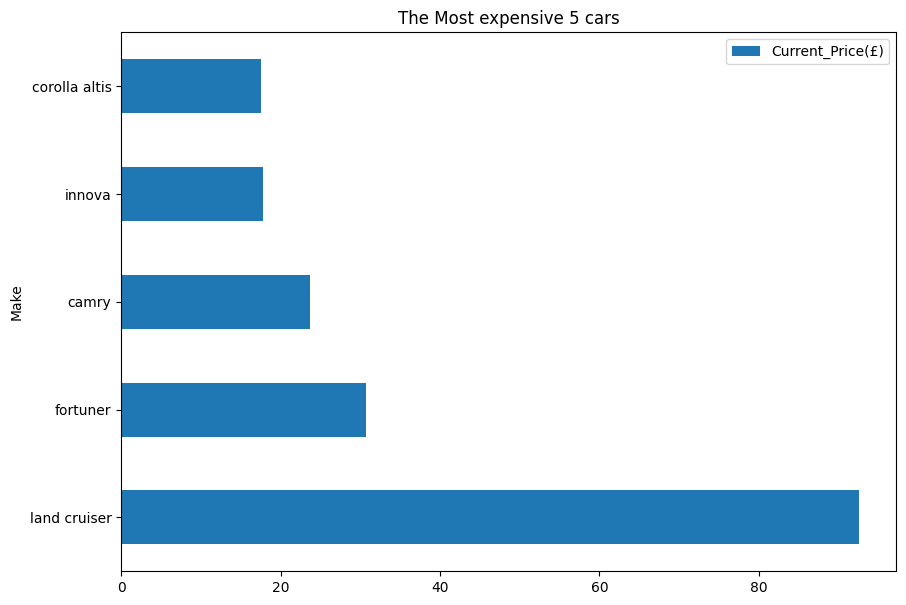

In [37]:
top5=pd.pivot_table(df,index='Make',values='Current_Price(£)').sort_values(by='Current_Price(£)',ascending=False)
top5=top5.head(5)
top5.plot(kind='barh',figsize=(10,7) ,title='The Most expensive 5 cars')

<AxesSubplot:title={'center':'Price level by number of owners'}, ylabel='Owner'>

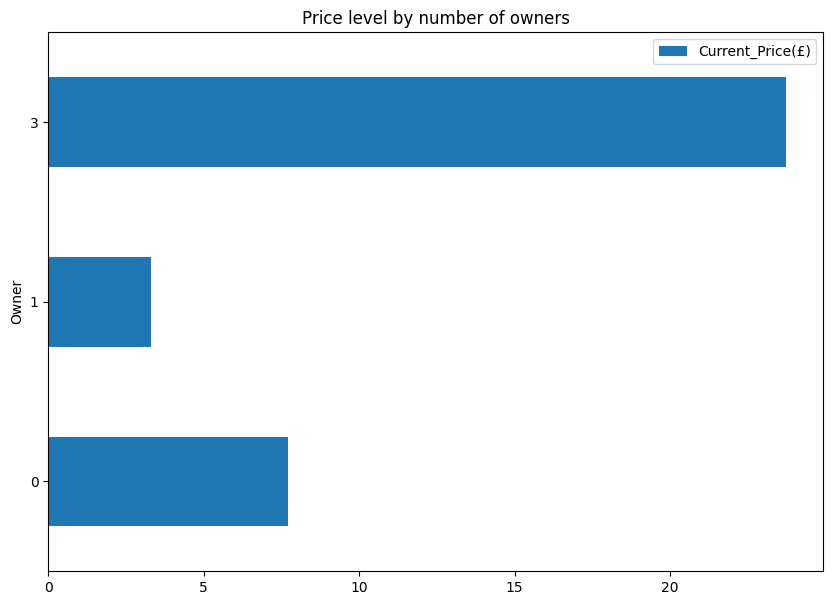

In [38]:
own=pd.pivot_table(df,index='Owner',values='Current_Price(£)')
own.plot(kind='barh',figsize=(10,7),title='Price level by number of owners')

<AxesSubplot:title={'center':'Price level by number of owners'}, xlabel='Owner'>

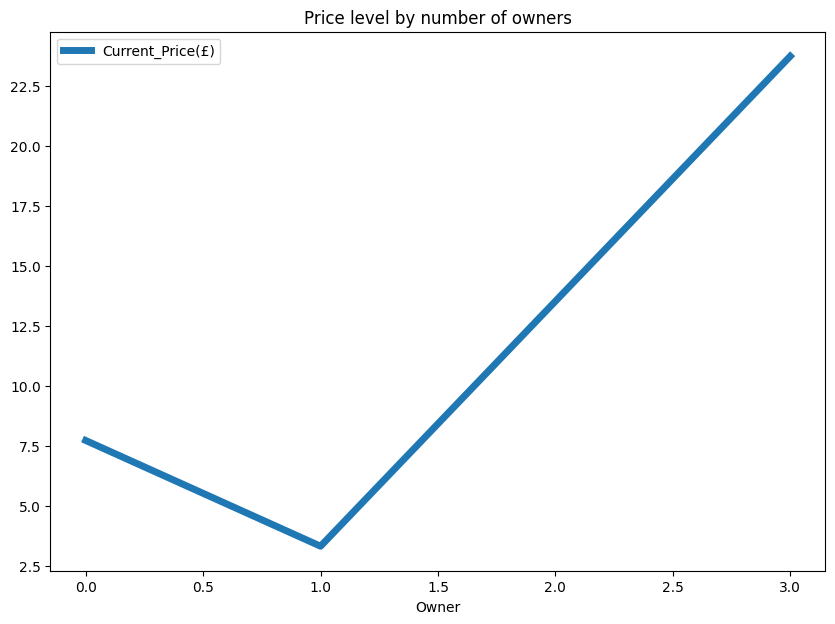

In [39]:
own=pd.pivot_table(df,index='Owner',values='Current_Price(£)')
own.plot(kind='line',figsize=(10,7),linewidth=5.0,title='Price level by number of owners')

<AxesSubplot:title={'center':'Average price by Fuel type'}, ylabel='transmission'>

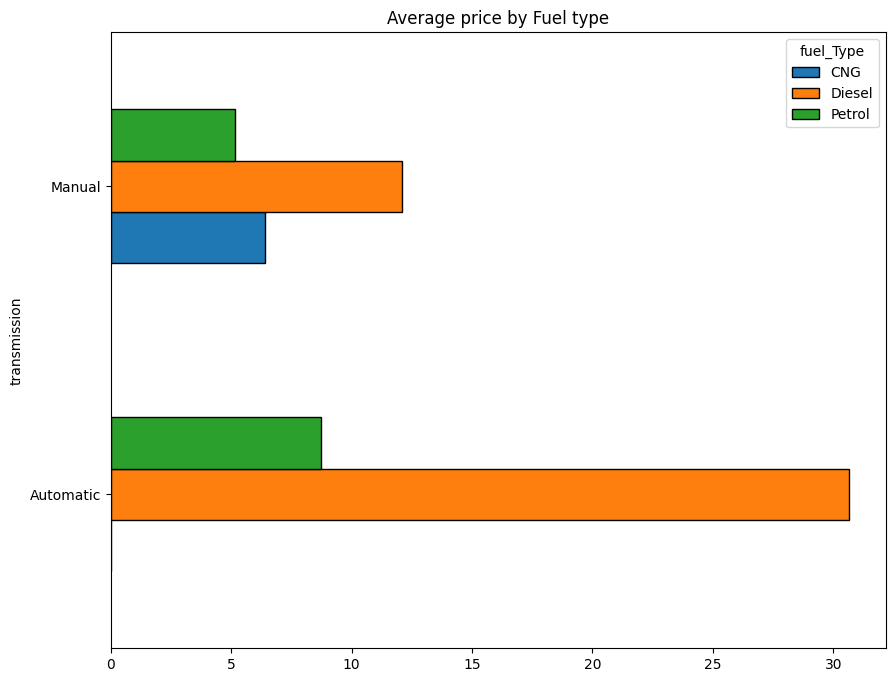

In [40]:
transm=pd.pivot_table(df,index='transmission',values='Current_Price(£)',columns='fuel_Type')
transm.plot(kind='barh',figsize=(10,8),edgecolor = 'black',title='Average price by Fuel type')

Automatic Diesel cars has the highest average price in the market, while Manuel petrol got the lowest average car price

<AxesSubplot:title={'center':'Number of cars by Fuel type'}, ylabel='fuel_Type'>

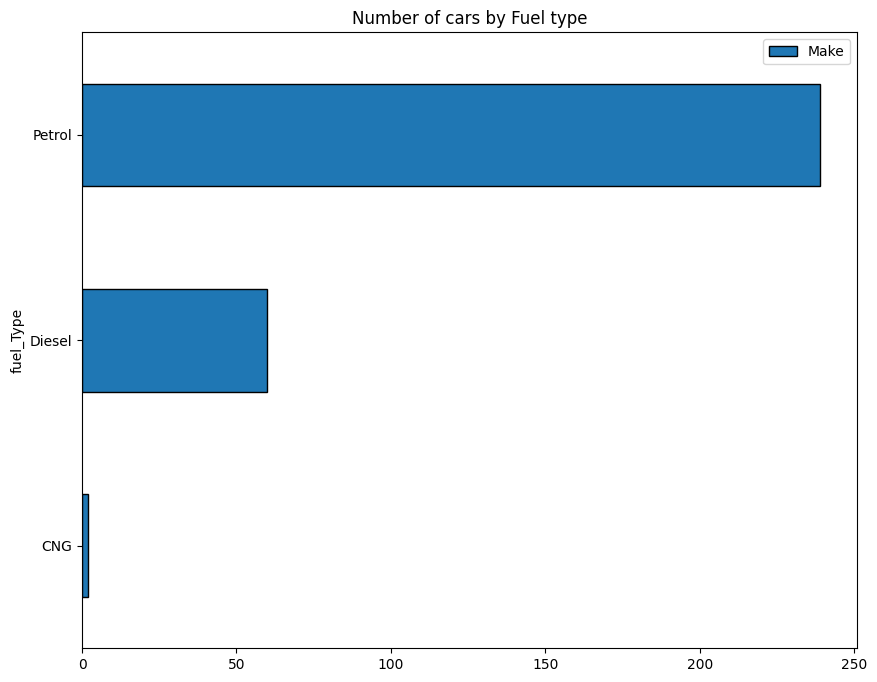

In [41]:
fuelc=pd.pivot_table(df,index='fuel_Type',values='Make',aggfunc='count').sort_values(by='Make')
fuelc.plot(kind='barh', edgecolor = 'black',figsize=(10,8),title='Number of cars by Fuel type')

Petrol fuel cars are the most common fuel type in the marke

array([<AxesSubplot:ylabel='Make'>], dtype=object)

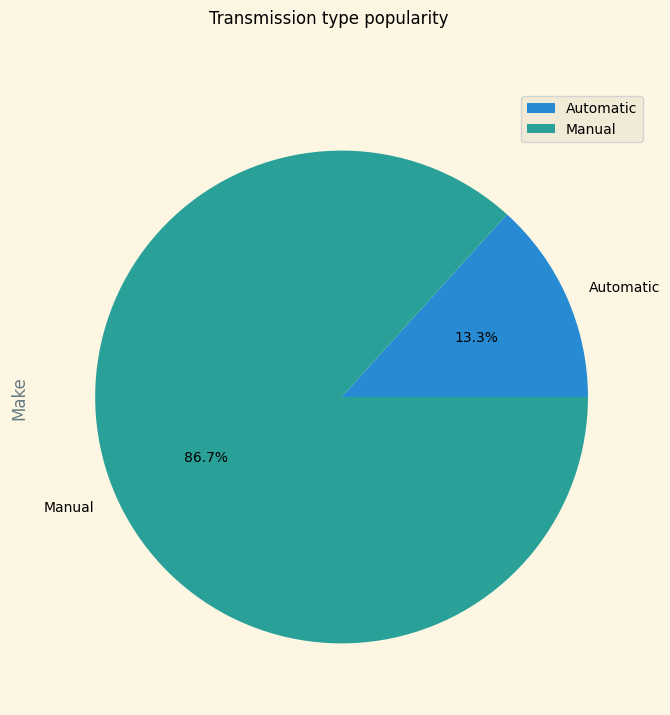

In [42]:
plt.style.use('Solarize_Light2')
transmc=pd.pivot_table(df,index='transmission',values='Make',aggfunc='count')
transmc.plot(kind='pie',figsize=(10,8),subplots=True,autopct='%1.1f%%',title='Transmission type popularity')

Manuel transission cars are more common

# Seperation of numeric and categorical variable

In [43]:
categorical_df = df.select_dtypes(include = 'object') # obtains all the datatypes that are objects  
categorical_df 

,Make,fuel_Type,Seller,transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


In [44]:
numeric_df = df.select_dtypes(include = 'number') # obtains all the datatypes that are numbers  
numeric_df 

,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


# One Hot Encoding

In [45]:
# importing the one hot encoder for the conversion of categorical variables to numeric
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [46]:
ohe = OneHotEncoder() # declares an instance of the object  
ohe_data=ohe.fit_transform(categorical_df[['fuel_Type']]).toarray() # applies the object to data  
feature_labels = ohe.categories_ # the labels are stored here
feature_labels = np.array(feature_labels).ravel() 
df_ohe = pd.DataFrame(ohe_data, columns = feature_labels ) # creating a dataframe for the ohe variable 
df_ohe.drop('CNG', axis = 1, inplace = True) # removing one axis from the fuel type column to prevent multicolinearity 
ohe_df = pd.concat([numeric_df,df_ohe], axis = 1) # combining the original dataframe (df) with onehot encoded fuel type i.e df_ohe 
# this will split all the values in fuel type into variables excluding one value that was dropped to prevent multicolinearity 
#an alternative method for this encoding process is using pd.getdummies()
ohe_df 


,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner,Diesel,Petrol
0,2014,3.35,5.59,27000,0,0.0,1.0
1,2013,4.75,9.54,43000,0,1.0,0.0
2,2017,7.25,9.85,6900,0,0.0,1.0
3,2011,2.85,4.15,5200,0,0.0,1.0
4,2014,4.60,6.87,42450,0,1.0,0.0
...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1.0,0.0
297,2015,4.00,5.90,60000,0,0.0,1.0
298,2009,3.35,11.00,87934,0,0.0,1.0
299,2017,11.50,12.50,9000,0,1.0,0.0


# Label Encoding

In [47]:
le = LabelEncoder()# declares an instance of the object 
le_data = le.fit_transform(categorical_df[['fuel_Type']])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['fuel_Type']) # creates a dataframe 
le_df = pd.concat([numeric_df,df_le], axis = 1) 
le_df 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner,fuel_Type
0,2014,3.35,5.59,27000,0,2
1,2013,4.75,9.54,43000,0,1
2,2017,7.25,9.85,6900,0,2
3,2011,2.85,4.15,5200,0,2
4,2014,4.60,6.87,42450,0,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1
297,2015,4.00,5.90,60000,0,2
298,2009,3.35,11.00,87934,0,2
299,2017,11.50,12.50,9000,0,1


The disadvantage of one hot encoding is that it increases the dimensions of the dataset while the advantage is that it does not create an ordering.
The disadvantage of label encoding is that it creates an ordering of the variable while the advantage is that it does not increase the dimension of the dataset.

I will be using the result from the label encoding

Attempting to use all the numerical continuous variables in the dataset provided to build a model to predict the Current_price. we shall Perform exploratory data analysis to select a subset of the variables and repeat the procedure. theresfter we shall Compare our models and report if there are any differences in the models’ performances.

All the numerical continuous variables that will be examined have been grouped into a new dataframe called le_df which includes all original numerical variables with label encoded numeric variable, fuel_Type. All other categorical variables were excluded from the label encoding since they will not be useful for the building of the models

# Exploratory Data Analysis (EDA)

<AxesSubplot:>

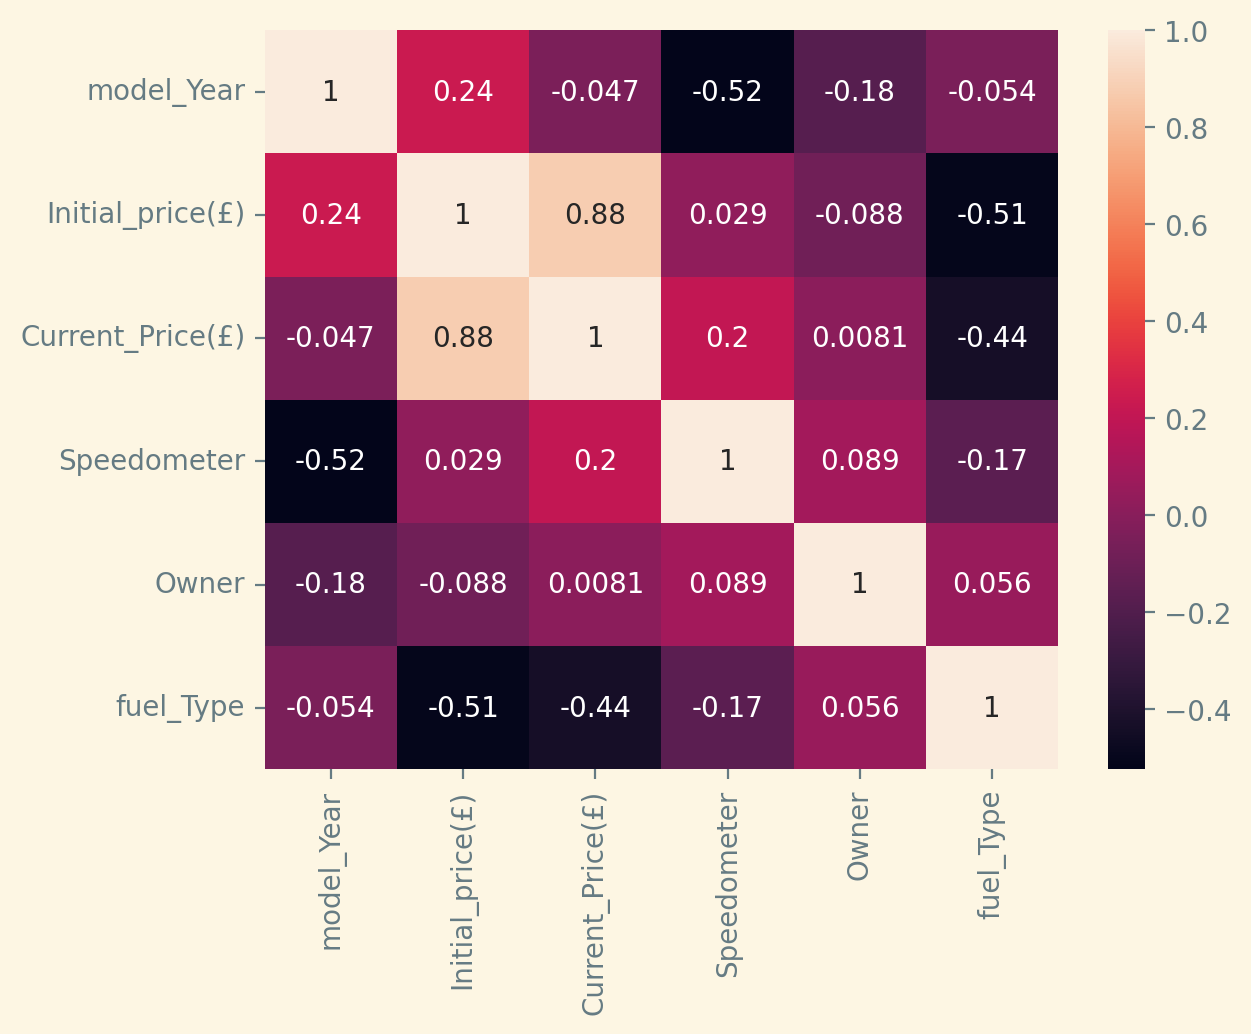

In [48]:
plt.figure(dpi=200) 
#le_df.drop(df[['model_Year']], axis = 1, inplace = True) # Model Year is not needed in this analysis since it's almost categorical
sns.heatmap(le_df.corr(), annot = True) 
# checking for correlation between numeric variables to see if any of the variables have strong relationship 

it can be seen that there is a good correlation between the variable except for fuel_Type which was initially a categorical variable
the variables with the highest correlation with the targets are

model_Year with -0.047 negative correlation
Initial_Price with 0.88 positive correlation

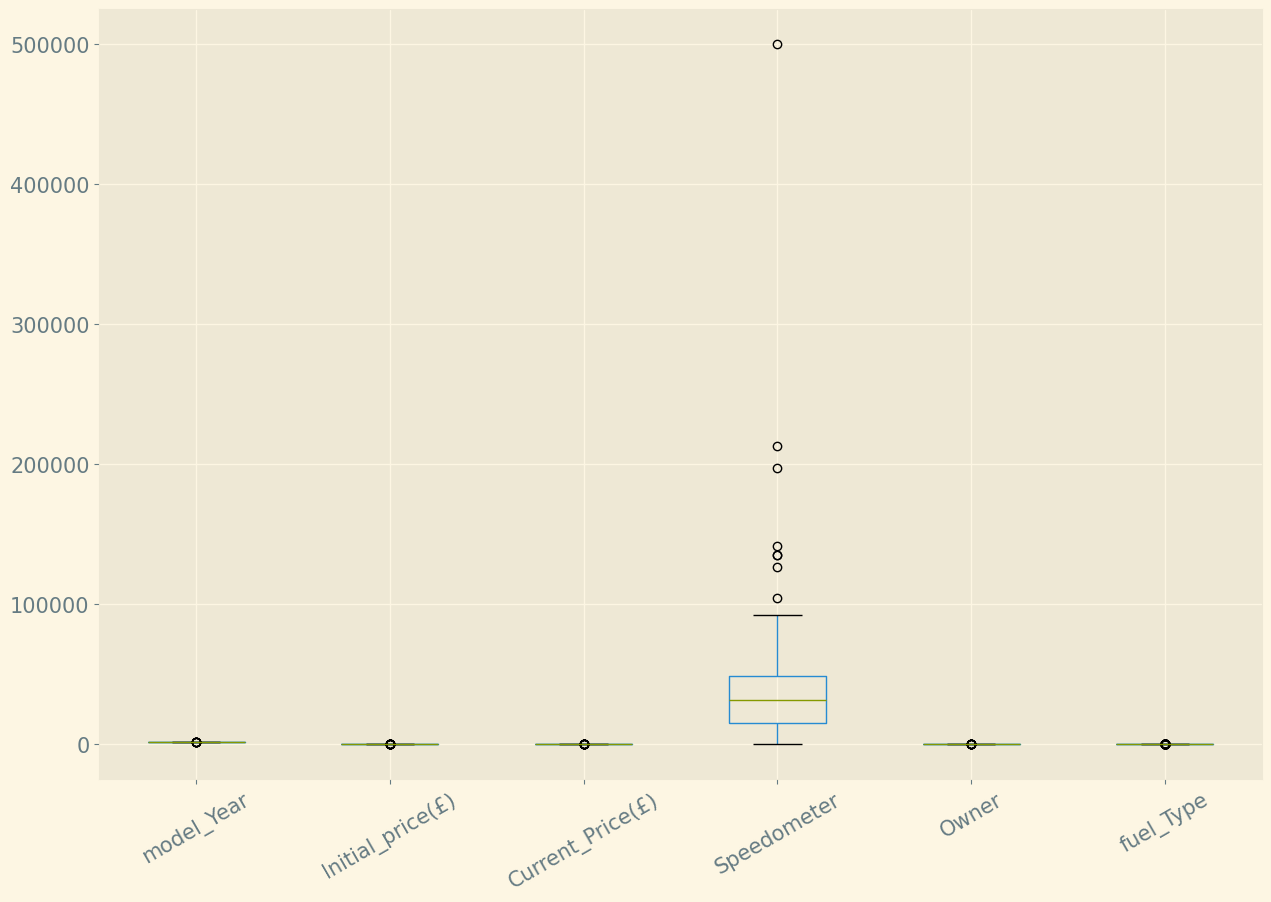

In [49]:
le_df.boxplot(figsize = (15,10), fontsize = 15, rot = 30) 
# to detect outliers
plt.show() 

The boxplot shows that some of the variables exert dominance over the others as it can be seen that the values of speedometer are bigger than the other columns, hence there will be a need for scaling or normalizing.

# Building the machine learning model

Linear regression is used for building machine learning with numeric data/ variables. 2 types of regression models will be evaluated for their performance; they include

1. Simple linear regression model
2. Multi-linear regression model

In [50]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

Creating the train, validation and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. Futhermore, we split the 80% of train data to validation data(20%) for validation.

In [51]:
df.columns

Index(['Make', 'model_Year', 'Initial_price(£)', 'Current_Price(£)',
       'Speedometer', 'fuel_Type', 'Seller', 'transmission', 'Owner'],
      dtype='object')

In [52]:
X = le_df.drop('Current_Price(£)', axis = 1) # dataset without the label (target variable)
y = le_df['Current_Price(£)'] # dataset with the label (target variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 
# train dataset was split again to give be 60 percent of the dataset
# test will be 20
# validation : 20

In [53]:
X_train

,model_Year,Initial_price(£),Speedometer,Owner,fuel_Type
27,2017,6.00,16200,0,2
256,2016,10.25,49562,0,2
88,2013,3.45,47000,0,2
145,2012,0.60,19000,0,2
134,2017,0.65,11800,0,2
...,...,...,...,...,...
142,2015,0.60,29000,0,2
113,2016,1.15,35000,0,2
107,2013,1.25,15000,0,2
264,2015,4.00,40026,0,2


In [54]:
y_train

27      6.49
256    13.60
88      6.05
145     0.81
134     0.81
       ...  
142     0.84
113     1.40
107     1.50
264     7.00
159     0.51
Name: Current_Price(£), Length: 192, dtype: float64

# Scaling the dataset

In [55]:
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

In [56]:
#converting to pandas dataframe 
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)  
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns) 
X_val_scaled = pd.DataFrame(X_val_scaled, columns = X_val.columns) 

# Simple Regression Model

Reshaping: sklearn accepts data in matrix form i.e. row and column. Hence when the data is a single feature, we need to reshape the data to have row and column. Note: the target does not need to be reshaped.
In order to reshape a series, we first need to convert to numpy arrary using series.to_numpy() and apply the .reshape(-1,1) funtion, where -1 is a place holder for all the rows and 1 represents the column

In [57]:
X_train_scaled['Speedometer'].shape # sklearn accepts data in rows and columns 

(192,)

In [58]:
# Reshaping the attribute 
X_train_scaled_EngSize=X_train_scaled['Speedometer'].to_numpy().reshape(-1,1)  
X_val_scaled_EngSize = X_val_scaled['Speedometer'].to_numpy().reshape(-1,1) 
X_test_scaled_EngSize = X_test_scaled['Speedometer'].to_numpy().reshape(-1,1) 

In [59]:
from sklearn.linear_model import LinearRegression # importing the model 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [60]:
model = LinearRegression() #instantiating the model

In [61]:
# The model test report 
def model_test_report(model): 
    model.fit(X_train_scaled_EngSize,y_train) 
    basem_preds = model.predict(X_test_scaled_EngSize)     
    mean_abs = mean_absolute_error(y_test,basem_preds) 
    mean_squared = mean_squared_error(y_test,basem_preds) 
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}") 
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}") 
 
         
model_test_report(model)  

The result of the mean_absolute_error is: 5.09
The result of the root mean squared error is : 6.84
The result of the coefficient of determination is: 0.07


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have X (feature matrix) and y (target variable) prepared

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.4362887714151684


In [138]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have X (feature matrix) and y (target variable, car prices) prepared

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.4577936216244171


# Multiplelinear regression

In [62]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled[['model_Year','Initial_price(£)']],y_train) 
    basem_preds = model.predict(X_test_scaled[['model_Year','Initial_price(£)']])     
    mean_abs = mean_absolute_error(y_test,basem_preds) 
    mean_squared = mean_squared_error(y_test,basem_preds) 
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}") 
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}") 
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}") 
 
report_model_test(model)

The result of the mean_absolute_error is: 2.34
The result of the root mean squared error is : 3.44
The result of the coefficient of determination is: 0.77


Findings

1. the Multiple linear regression has a lower mean absolute error (2.34) than the Simple Regression Model (5.09): the lower the error, the better the model
2. the Multiple linear regression has a higher coefficient of determination of 0.77 than Simple Regression Model of 0.07

In conclusion, the Multiple linear regression (model_Year and Initial_price variables) performed better than simple linear regression.

# Let's check whether there were any noticeable positive varaition in the current_Price over the years.

In [63]:
#Reload data
df_yr= pd.read_csv('car data.csv')

In [64]:
df_yr

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [65]:
df_yr.rename(columns = {'Car_Name':'Make', 'Year': 'model_Year', 'Selling_Price': 'Initial_price(£)', 
                     'Present_Price':'Current_Price(£)', 'Driven_kms': 'Speedometer','Fuel_Type':'fuel_Type',
                  'Selling_type':'Seller', 'Transmission':'transmission'}, inplace = True)

df_yr.head()

,Make,model_Year,Initial_price(£),Current_Price(£),Speedometer,fuel_Type,Seller,transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [66]:
df_yr['Current_Price(£)'] =  df_yr['Current_Price(£)'].astype(float)
df_yr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              301 non-null    object 
 1   model_Year        301 non-null    int64  
 2   Initial_price(£)  301 non-null    float64
 3   Current_Price(£)  301 non-null    float64
 4   Speedometer       301 non-null    int64  
 5   fuel_Type         301 non-null    object 
 6   Seller            301 non-null    object 
 7   transmission      301 non-null    object 
 8   Owner             301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


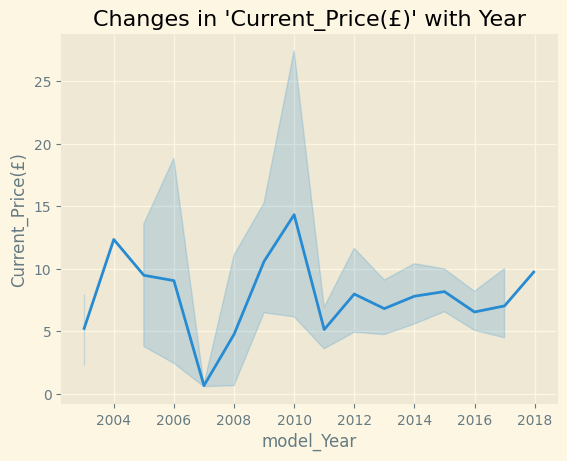

In [67]:
sns.lineplot(data = df_yr, x = "model_Year",  y = 'Current_Price(£)');
plt.title("Changes in 'Current_Price(£)' with Year")
plt.ylabel('Current_Price(£)');
#plt.xticks(rotation = 90) # to prevent overlapping
#plt.savefig(r"C:\Users\USER\Desktop\Module 3 Project\Changes in 'Current_Price(£)' with Year.png")

Prices fluctuates over the years. before 2004, it was at £5 and rise to about £13 at the end of 2004, it went to zero sales in 2007. The highest price was experienced in 2010, afterwhich, there was a fall in price upto 2012. it became relatively stable with little price variations from 2012 to 2028

# PREDICTING WITH CATEGORICAL VARIABLES

Using each categorical variable as the target variable at each instance, let's determine which of the variables performed best in classifying the dataset. 

In [68]:
#Reload data
df_Clas= pd.read_csv('car data.csv')

In [69]:
df_Clas

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [70]:
df_Clas.rename(columns = {'Car_Name':'Make', 'Year': 'model_Year', 'Selling_Price': 'Initial_price(£)', 
                     'Present_Price':'Current_Price(£)', 'Driven_kms': 'Speedometer','Fuel_Type':'fuel_Type',
                  'Selling_type':'Seller', 'Transmission':'transmission'}, inplace = True)

df_Clas.head()

,Make,model_Year,Initial_price(£),Current_Price(£),Speedometer,fuel_Type,Seller,transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [71]:
df_Clas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              301 non-null    object 
 1   model_Year        301 non-null    int64  
 2   Initial_price(£)  301 non-null    float64
 3   Current_Price(£)  301 non-null    float64
 4   Speedometer       301 non-null    int64  
 5   fuel_Type         301 non-null    object 
 6   Seller            301 non-null    object 
 7   transmission      301 non-null    object 
 8   Owner             301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [72]:
df_Clas.reset_index(inplace = True) 
df_Clas.drop(df_Clas[['index']], axis = 1, inplace = True) 

In [73]:
# identifying the categorical variables
df_Clas.select_dtypes(exclude = "number").head()

,Make,fuel_Type,Seller,transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [74]:
numeric_df_Clas = df_Clas.select_dtypes(include = 'number') # obtains all the datatypes that are numbers  
numeric_df_Clas 

,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


In [75]:
cat_df_clas = df_Clas.select_dtypes(exclude = 'number') # obtains all the datatypes that are numbers  
cat_df_clas 

,Make,fuel_Type,Seller,transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


# LABEL ENCODING

Conversion of all categorical variables to numbers

In [76]:
#Make
df_Clas.Make.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [77]:
le = LabelEncoder()# declares an instance of the object 
le_data = le.fit_transform(cat_df_clas [['Make']])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['Make']) # creates a dataframe 
make_le_df = pd.concat([numeric_df_Clas,df_le], axis = 1) 
make_le_df 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner,Make
0,2014,3.35,5.59,27000,0,90
1,2013,4.75,9.54,43000,0,93
2,2017,7.25,9.85,6900,0,68
3,2011,2.85,4.15,5200,0,96
4,2014,4.60,6.87,42450,0,92
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,69
297,2015,4.00,5.90,60000,0,66
298,2009,3.35,11.00,87934,0,69
299,2017,11.50,12.50,9000,0,69


In [78]:
# fuel type
df_Clas.fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [79]:
le = LabelEncoder()# declares an instance of the object 
le_data = le.fit_transform(cat_df_clas[['fuel_Type']])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['fuel_Type']) # creates a dataframe 
fuel_le_df = pd.concat([numeric_df_Clas,df_le], axis = 1) 
fuel_le_df 



# ohe = OneHotEncoder() # declares an instance of the object  
# ohe_data=ohe.fit_transform(categorical_df_class[['FuelType']]).toarray() # applies the object to data  
# feature_labels = ohe.categories_ # the labels are stored here
# feature_labels = np.array(feature_labels).ravel() 
# fuel_df_ohe = pd.DataFrame(ohe_data, columns = feature_labels ) # creating a dataframe for the ohe variable 
# fuel_df_ohe.drop('Z', axis = 1, inplace = True) # removing one axis from the fuel type column to prevent multicolinearity 
# #ohe_df = pd.concat([numeric_df_class,df_ohe], axis = 1) # combining the original dataframe (df) with onehot encoded fuel type i.e df_ohe 
# # this will split all the values in fuel type into variables excluding one value that was dropped to prevent multicolinearity 
# #an alternative method for this encoding process is using pd.getdummies()
# fuel_df_ohe


c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner,fuel_Type
0,2014,3.35,5.59,27000,0,2
1,2013,4.75,9.54,43000,0,1
2,2017,7.25,9.85,6900,0,2
3,2011,2.85,4.15,5200,0,2
4,2014,4.60,6.87,42450,0,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1
297,2015,4.00,5.90,60000,0,2
298,2009,3.35,11.00,87934,0,2
299,2017,11.50,12.50,9000,0,1


In [80]:
df_Clas.columns

Index(['Make', 'model_Year', 'Initial_price(£)', 'Current_Price(£)',
       'Speedometer', 'fuel_Type', 'Seller', 'transmission', 'Owner'],
      dtype='object')

In [81]:
# transmission
df_Clas['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [82]:
le = LabelEncoder()# declares an instance of the object 
le_data = le.fit_transform(cat_df_clas [['transmission']])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['transmission']) # creates a dataframe 
Trans_le_df = pd.concat([numeric_df_Clas,df_le], axis = 1) 
Trans_le_df 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner,transmission
0,2014,3.35,5.59,27000,0,1
1,2013,4.75,9.54,43000,0,1
2,2017,7.25,9.85,6900,0,1
3,2011,2.85,4.15,5200,0,1
4,2014,4.60,6.87,42450,0,1
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,1
297,2015,4.00,5.90,60000,0,1
298,2009,3.35,11.00,87934,0,1
299,2017,11.50,12.50,9000,0,1


In [83]:
#Seller
df_Clas['Seller'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [84]:
le = LabelEncoder()# declares an instance of the object 
le_data = le.fit_transform(cat_df_clas [['Seller']])# applies the object to data 
df_le = pd.DataFrame(le_data, columns = ['Seller']) # creates a dataframe 
Sell_le_df = pd.concat([numeric_df_Clas,df_le], axis = 1) 
Sell_le_df 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model_Year,Initial_price(£),Current_Price(£),Speedometer,Owner,Seller
0,2014,3.35,5.59,27000,0,0
1,2013,4.75,9.54,43000,0,0
2,2017,7.25,9.85,6900,0,0
3,2011,2.85,4.15,5200,0,0
4,2014,4.60,6.87,42450,0,0
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,0
297,2015,4.00,5.90,60000,0,0
298,2009,3.35,11.00,87934,0,0
299,2017,11.50,12.50,9000,0,0


I will be buiding models for each of the label encoded variables as target against the numeric variables

# Classification
First Target: Using Speedometer as the first target / Label - since it's also categorical in nature
Balance the dataset
Balancing your dataset is an important consideration while building a machine learning model. This is because machine learning learning models learn more with the availability of many examples.
There are several methods, however, here we are using Synthetic Minority Over-sampling Technique. Note: balancing is done based on the target variable.
Plot of the target class(Speedometer) to see the distribution of values
As can be seen from the plot the model-Year, 2015 has the highest price followed by 2016, 2014, 2017, 2013,and 2013.There was a drastic change in price from 2012 down to 2003. This shows that the dataset is not balanced.

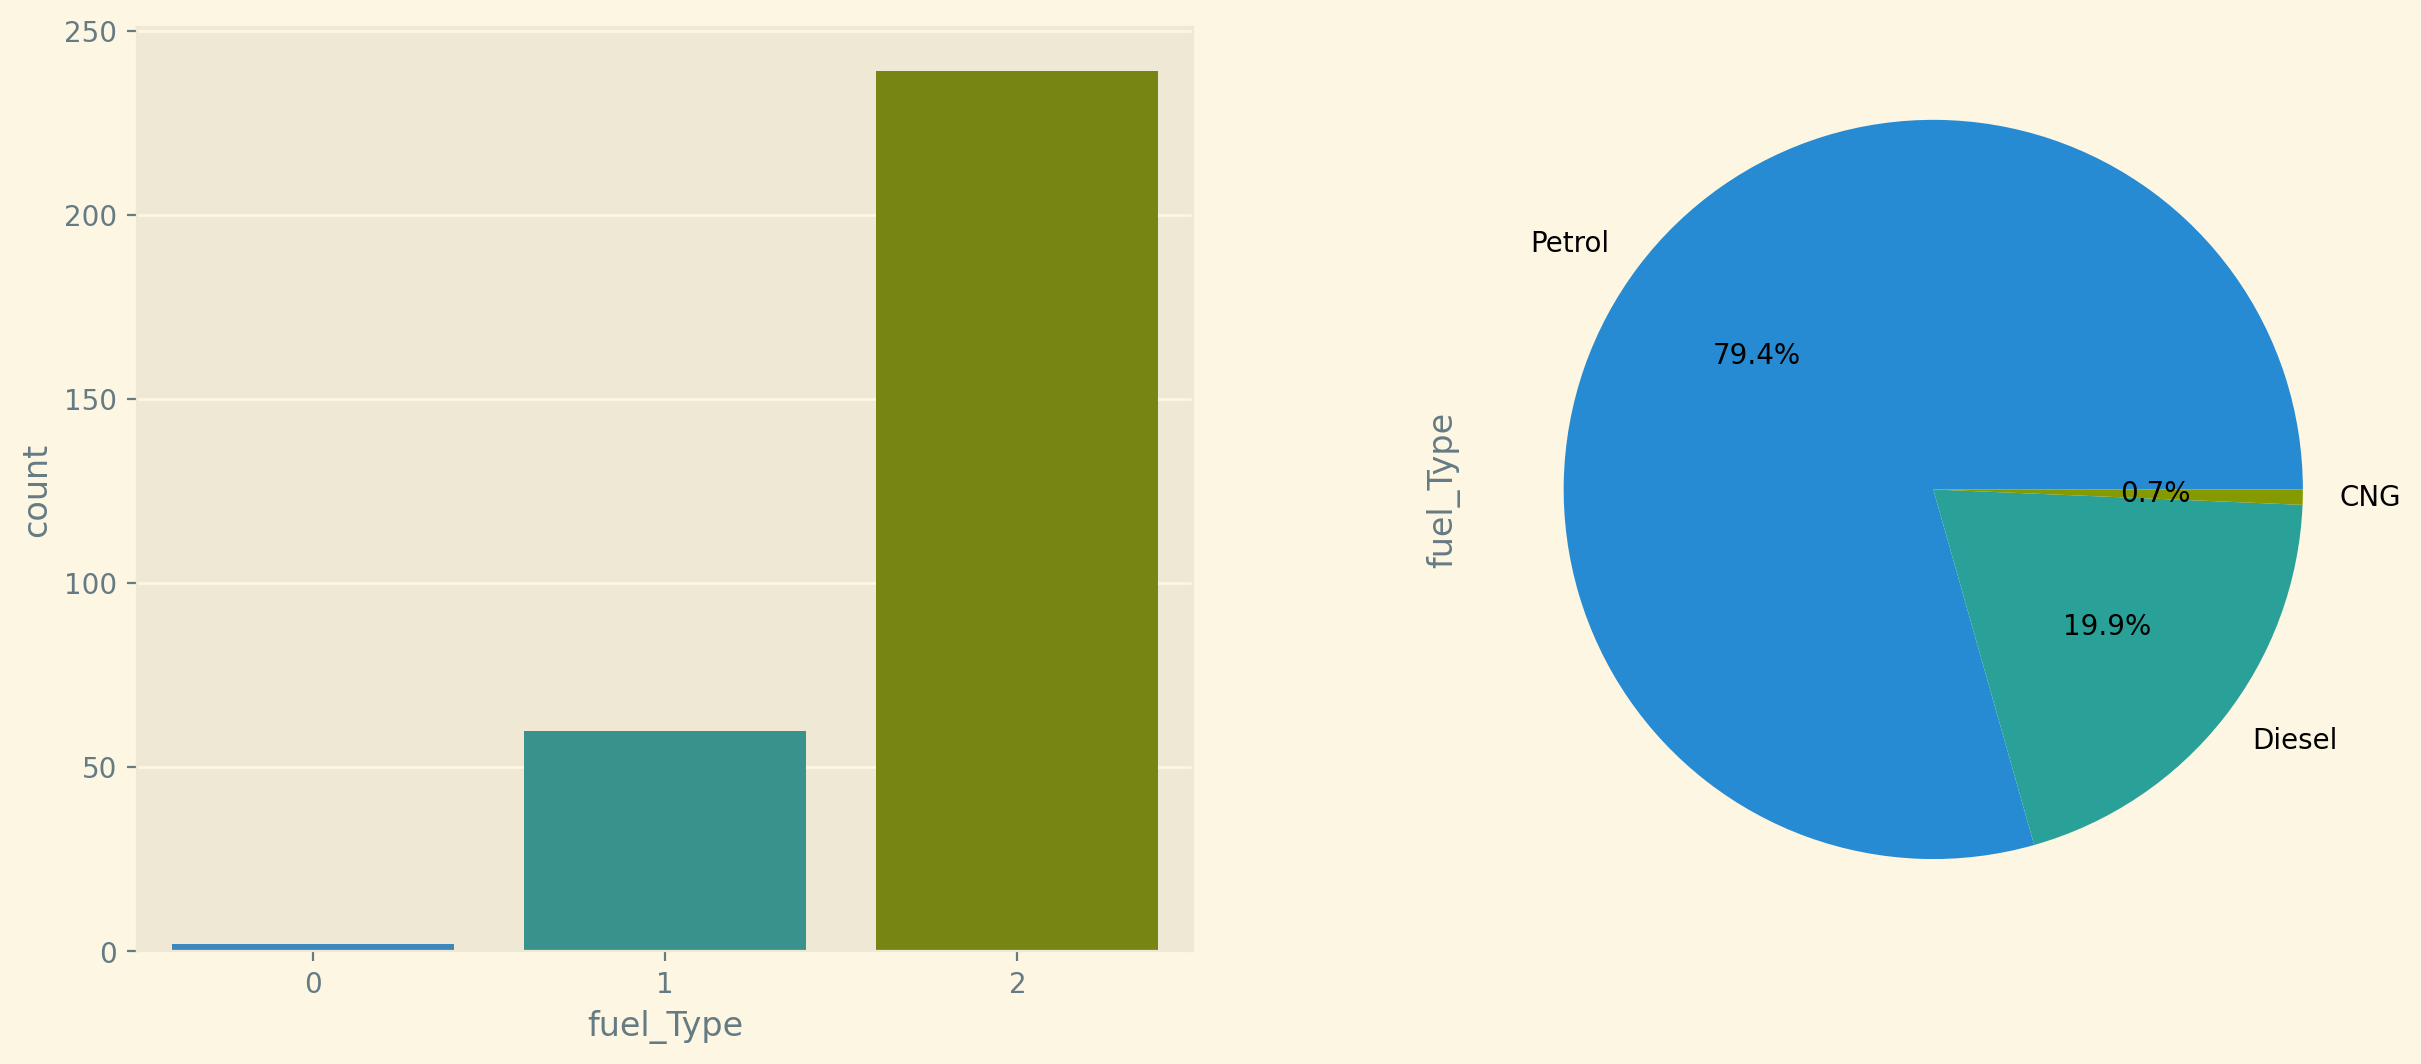

In [85]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting 
a = sns.countplot(x='fuel_Type', data=le_df, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0 
a= df_Clas['fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1 

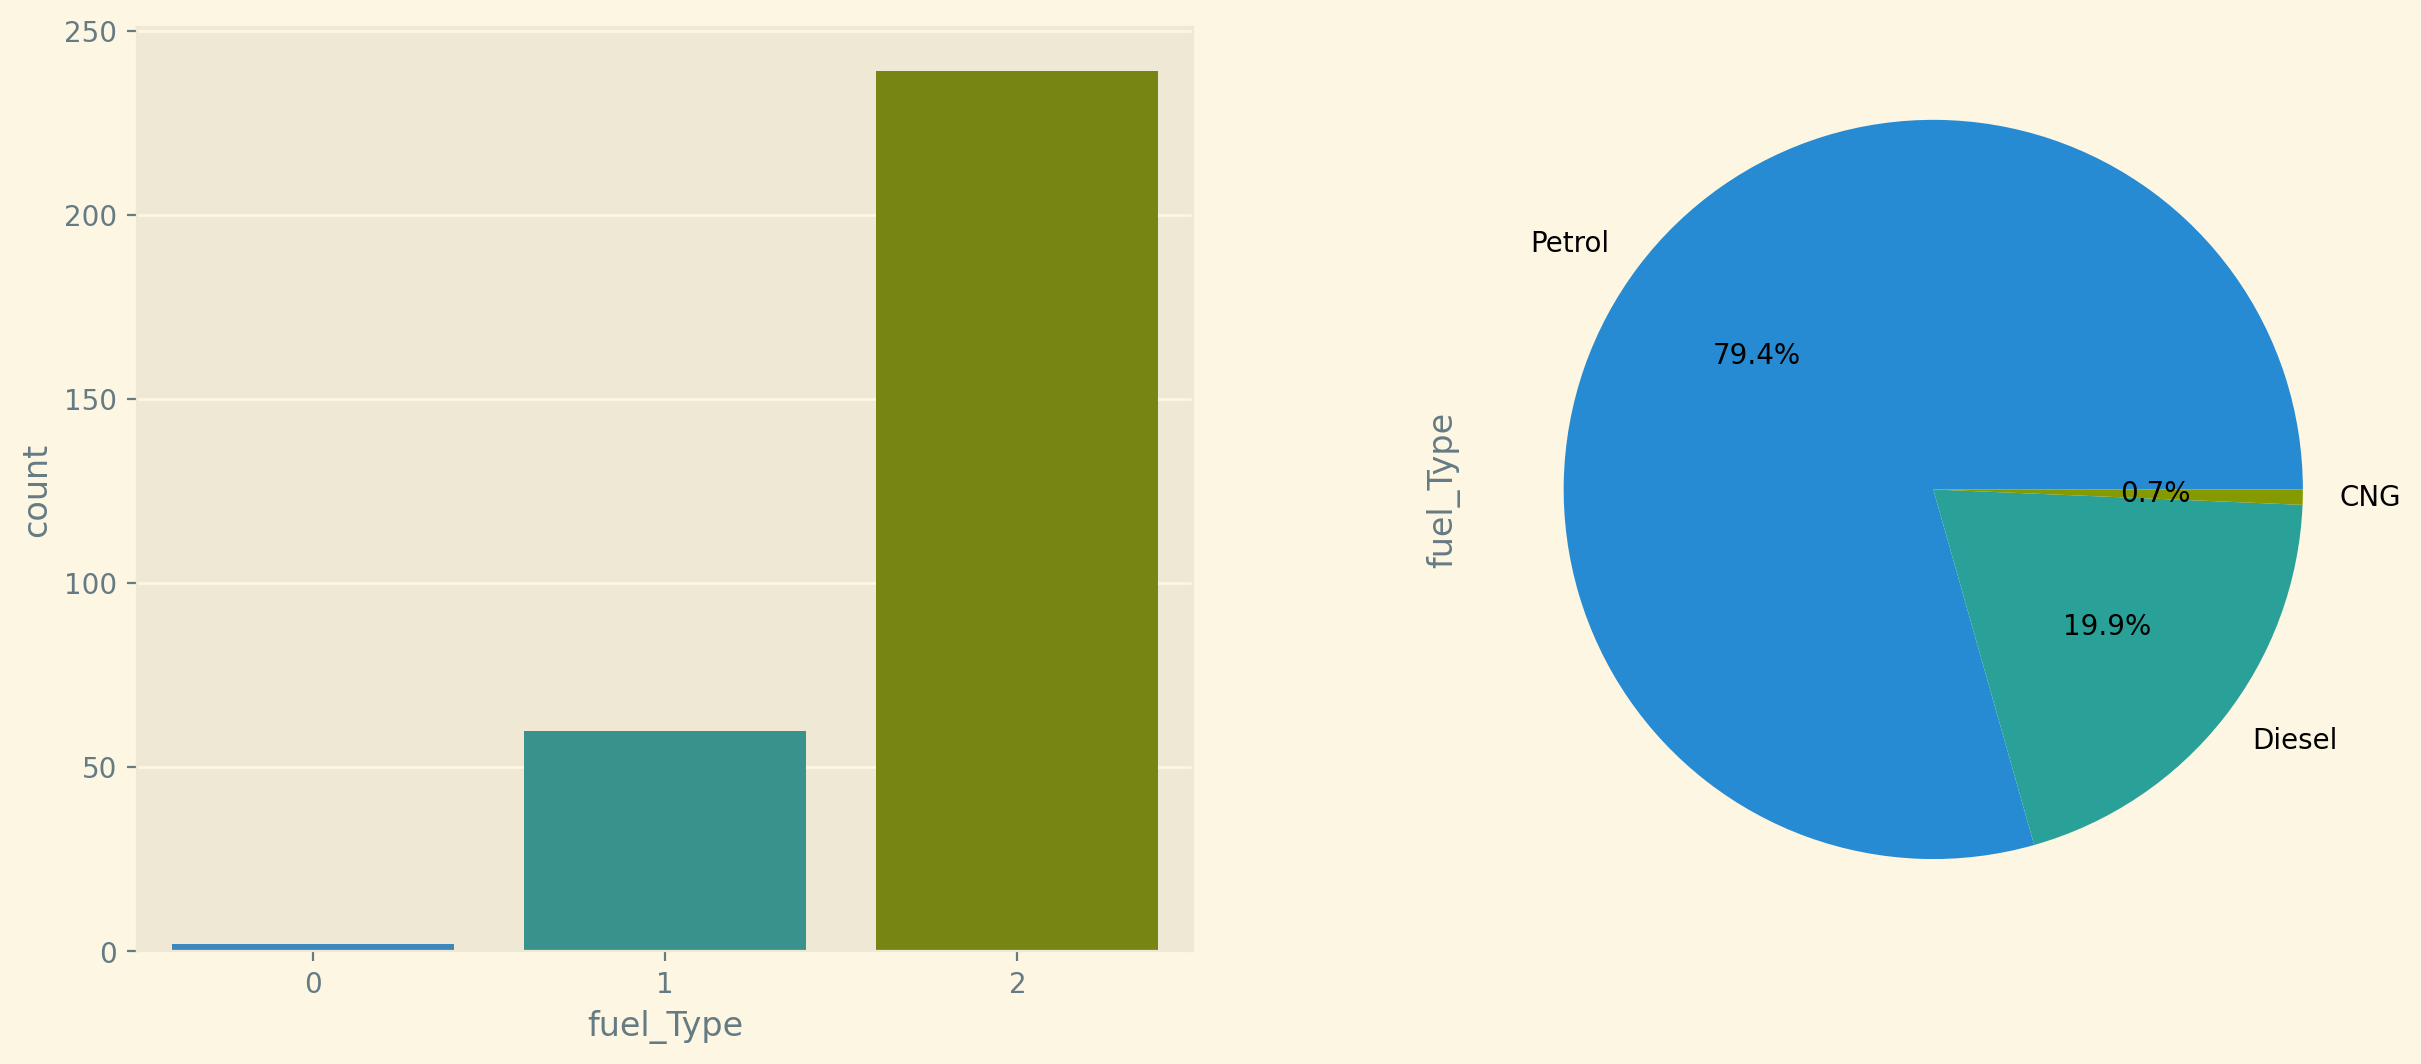

In [86]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting 
a = sns.countplot(x='fuel_Type', data=le_df, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0 
a= df_Clas['fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1 

In [90]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

In [91]:
# balancing the target variable for efficient machine learning
X = le_df.drop('fuel_Type', axis = 1) 
y = le_df['fuel_Type'] 

In [92]:
# Applying smote to balance the dataset

In [93]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, k_neighbors = 5) # The object is created  
X_res, y_res = sm.fit_resample(X, y) # The object is applied 
X, y = X_res, y_res # reassigning the balanced dataset to X,y

# from imblearn import over_sampling
# from imblearn.over_sampling import SMOTE
#balanced = SMOTE()
#x_balanced , y_balanced = balanced.fit_resample(X_train,y_train)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 6

# Let's try building Base Models

A base model is a simple model that acts as a reference in a machine learning project.

In [94]:
from sklearn.linear_model import LogisticRegression 

In [95]:
model = LogisticRegression() 

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
 
X,y=X_train,y_train 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 

In [97]:
scaler = MinMaxScaler() 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_val_scaled = scaler.transform(X_val) 

              precision    recall  f1-score   support

           1       0.67      0.13      0.22        15
           2       0.78      0.98      0.87        46

    accuracy                           0.77        61
   macro avg       0.72      0.56      0.54        61
weighted avg       0.75      0.77      0.71        61



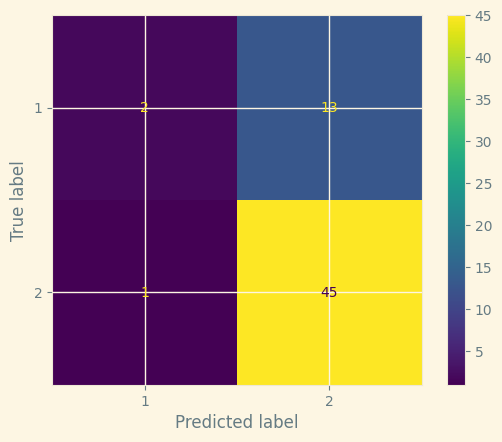

<Figure size 8000x8000 with 0 Axes>

In [98]:
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
report_model_test(model) 

# Decision tree

In [99]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 

In [100]:
model = DecisionTreeClassifier() 

                  Feature_importance
Owner                       0.000000
model_Year                  0.041466
Current_Price(£)            0.123133
Speedometer                 0.312119
Initial_price(£)            0.523282
              precision    recall  f1-score   support

           1       0.75      0.40      0.52        15
           2       0.83      0.96      0.89        46

    accuracy                           0.82        61
   macro avg       0.79      0.68      0.71        61
weighted avg       0.81      0.82      0.80        61



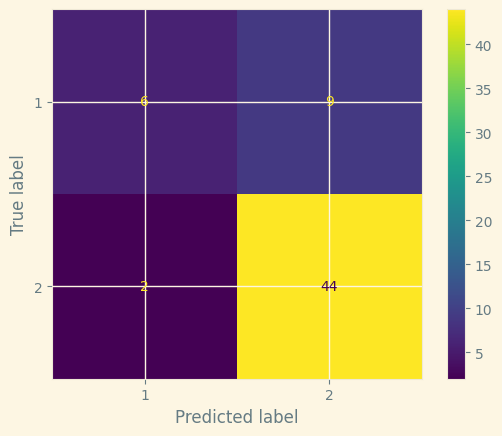

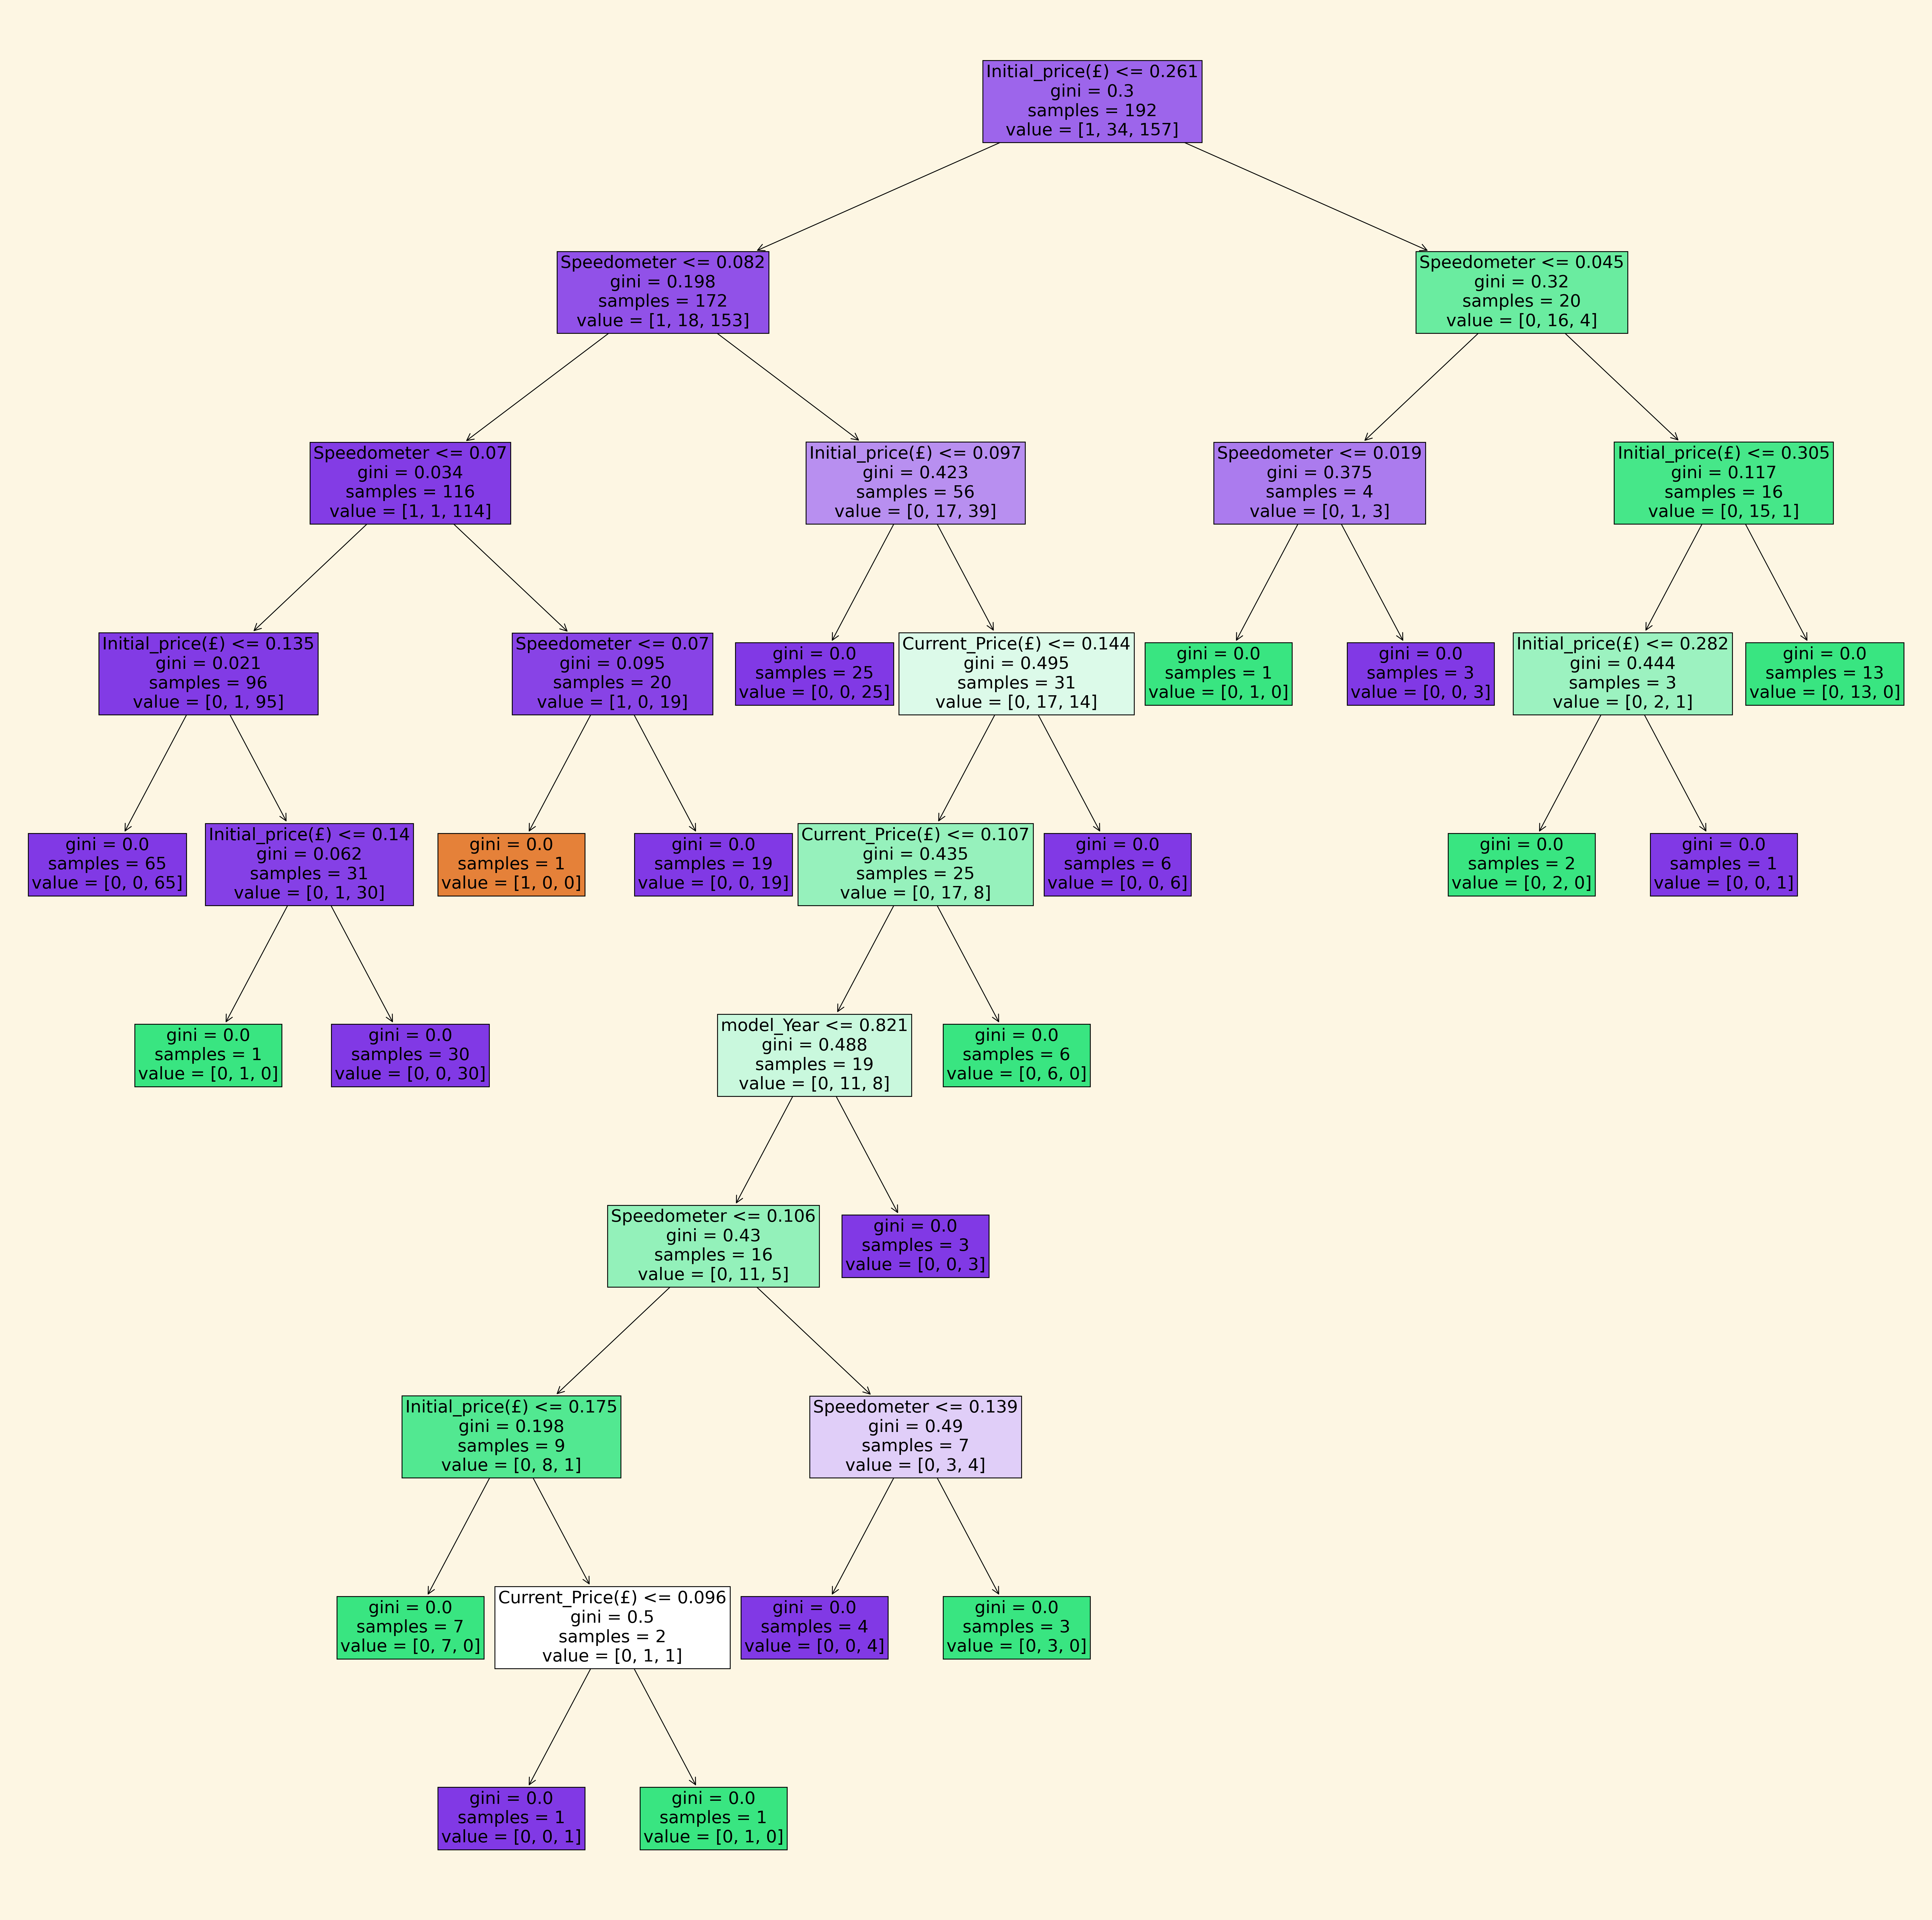

In [101]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled) 
    
    feature_importance=pd.DataFrame(data=model.feature_importances_, index = X.columns, 
             columns = ['Feature_importance']).sort_values('Feature_importance') 
    print(feature_importance) 
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model,X_test_scaled, y_test) 
    
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
    plot_tree(model, feature_names = X.columns, filled = True, fontsize=20 ); 
     
report_model_test(model) 

# KNeighborsClassifier

In [102]:
from sklearn.neighbors import KNeighborsClassifier 

In [103]:
model = KNeighborsClassifier() # instance of the model object

              precision    recall  f1-score   support

           1       0.75      0.40      0.52        15
           2       0.83      0.96      0.89        46

    accuracy                           0.82        61
   macro avg       0.79      0.68      0.71        61
weighted avg       0.81      0.82      0.80        61



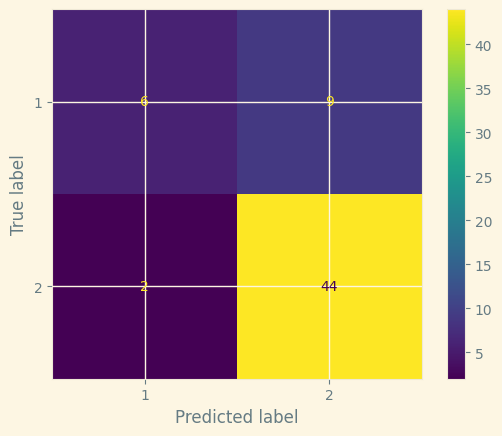

<Figure size 8000x8000 with 0 Axes>

In [104]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

# Support vector machines (svm)

In [105]:
from sklearn.svm import SVC # SVC: support vector classifier  

In [106]:
model = SVC() 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.50      0.13      0.21        15
           2       0.77      0.96      0.85        46

    accuracy                           0.75        61
   macro avg       0.64      0.54      0.53        61
weighted avg       0.71      0.75      0.70        61



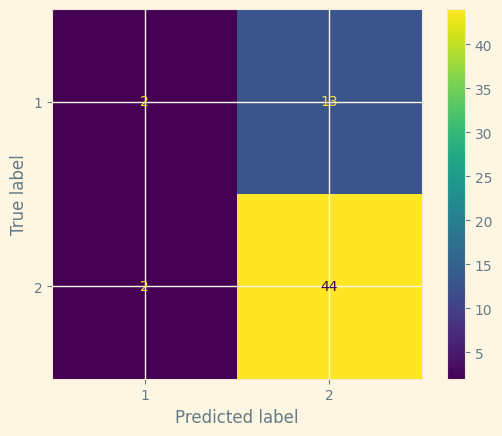

<Figure size 8000x8000 with 0 Axes>

In [125]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
  
     
report_model_test(model) 

# Random forest

In [132]:
from sklearn.ensemble import RandomForestClassifier 

In [133]:
model = RandomForestClassifier()

              precision    recall  f1-score   support

           1       0.86      0.40      0.55        15
           2       0.83      0.98      0.90        46

    accuracy                           0.84        61
   macro avg       0.85      0.69      0.72        61
weighted avg       0.84      0.84      0.81        61



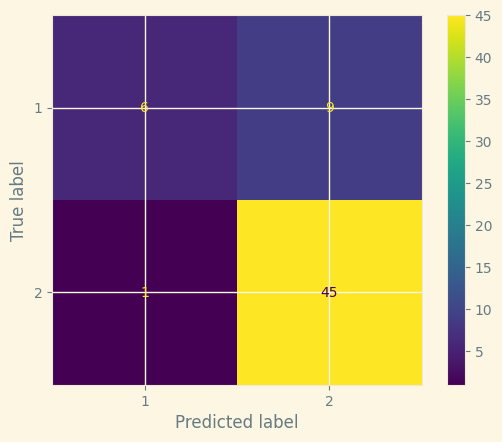

<Figure size 8000x8000 with 0 Axes>

In [134]:
# The model test report 
def report_model_test(model): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 

In [136]:
def report_model_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    basem_preds = model.predict(X_test)
    
    print("Classification Report:")
    print(classification_report(y_test, basem_preds))
    
    # Calculate feature importance
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()[::-1]

    print("\nFeature Importance:")
    for i in sorted_idx:
        print(f"{X_train.columns[i]}: {feature_importance[i]:.4f}")
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()
    
report_model_test(model)  

TypeError: report_model_test() missing 4 required positional arguments: 'X_train', 'y_train', 'X_test', and 'y_test'

Cross validation - process of using all samples to train and all samples to test

Import the algorithm class from the sklearn i.e., from sklearn.linear_model import LogisticRegression
Instantiate the model i.e., model = LogisticRegression()
Import cross validation from sklearn i.e., from sklearn.model_selection import cross_val_score
Apply cross validation i.e., cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)

In [111]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_validate, KFold, cross_val_score 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 

In [112]:
# Appending several models for cross validation 
models = []  
models.append(("LR",LogisticRegression())) 
models.append(("KNN",KNeighborsClassifier())) 
models.append(("Dtree",DecisionTreeClassifier())) 
models.append(("SVC",SVC())) 
models.append(("RF",RandomForestClassifier()))
 
models 

[('LR', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('Dtree', DecisionTreeClassifier()),
 ('SVC', SVC()),
 ('RF', RandomForestClassifier())]

In [113]:
def report_cross_val_score(models): 
    for name,model in models: 
        kfold = KFold(n_splits=5) 
        cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy") 
        print(name, cv_result) 
        print("Mean is:", name, cv_result.mean()) 
        print("Standard Deviation is:", name, cv_result.std())
             
report_cross_val_score(models) 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR [0.87179487 0.87179487 0.84210526 0.76315789 0.84210526]
Mean is: LR 0.8381916329284749
Standard Deviation is: LR 0.039797110937302975
KNN [0.84615385 0.87179487 0.76315789 0.76315789 0.84210526]
Mean is: KNN 0.8172739541160594
Standard Deviation is: KNN 0.04534372790773852
Dtree [0.87179487 0.84615385 0.84210526 1.         0.84210526]
Mean is: Dtree 0.8804318488529015
Standard Deviation is: Dtree 0.060801276224346106
SVC [0.8974359  0.82051282 0.76315789 0.73684211 0.84210526]
Mean is: SVC 0.8120107962213226
Standard Deviation is: SVC 0.0571180310560272
RF [0.87179487 0.87179487 0.89473684 0.86842105 0.86842105]
Mean is: RF 0.875033738191633
Standard Deviation is: RF 0.009966423987928066


LR
              precision    recall  f1-score   support

           1       0.67      0.13      0.22        15
           2       0.78      0.98      0.87        46

    accuracy                           0.77        61
   macro avg       0.72      0.56      0.54        61
weighted avg       0.75      0.77      0.71        61



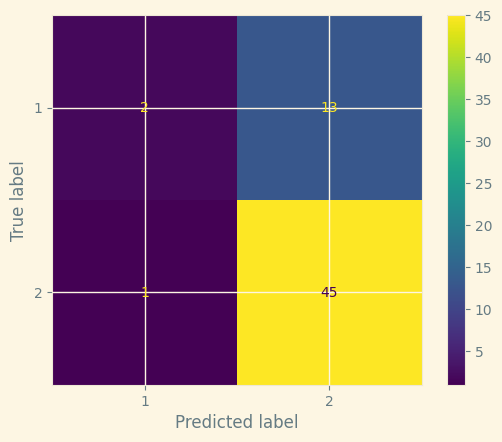

KNN
              precision    recall  f1-score   support

           1       0.75      0.40      0.52        15
           2       0.83      0.96      0.89        46

    accuracy                           0.82        61
   macro avg       0.79      0.68      0.71        61
weighted avg       0.81      0.82      0.80        61



<Figure size 8000x8000 with 0 Axes>

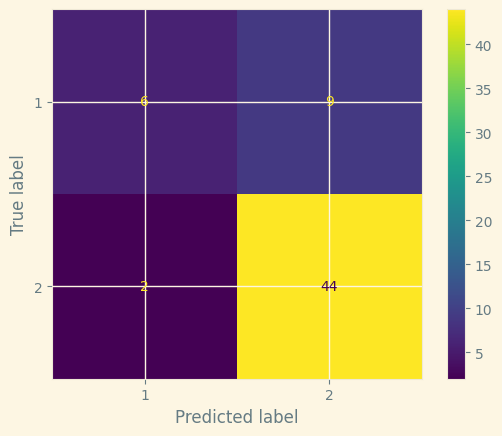

Dtree
              precision    recall  f1-score   support

           1       0.71      0.33      0.45        15
           2       0.81      0.96      0.88        46

    accuracy                           0.80        61
   macro avg       0.76      0.64      0.67        61
weighted avg       0.79      0.80      0.78        61



<Figure size 8000x8000 with 0 Axes>

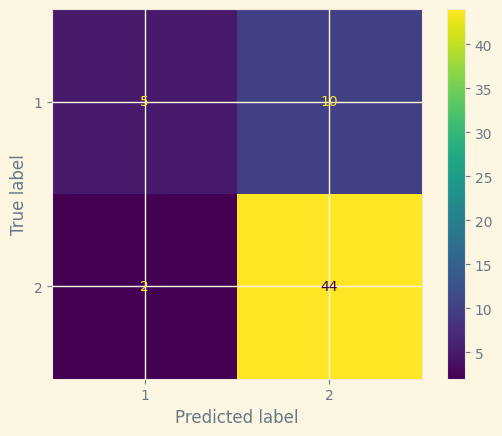

SVC
              precision    recall  f1-score   support

           1       1.00      0.13      0.24        15
           2       0.78      1.00      0.88        46

    accuracy                           0.79        61
   macro avg       0.89      0.57      0.56        61
weighted avg       0.83      0.79      0.72        61



<Figure size 8000x8000 with 0 Axes>

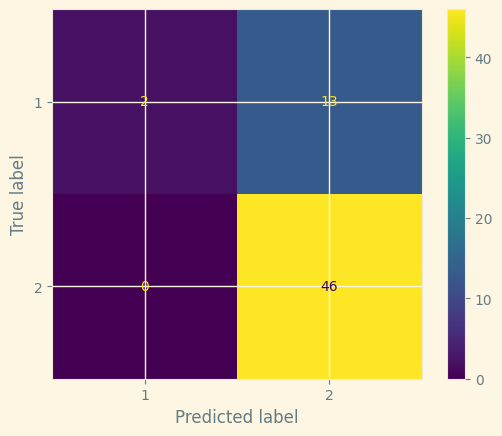

RF
              precision    recall  f1-score   support

           1       0.88      0.47      0.61        15
           2       0.85      0.98      0.91        46

    accuracy                           0.85        61
   macro avg       0.86      0.72      0.76        61
weighted avg       0.86      0.85      0.84        61



<Figure size 8000x8000 with 0 Axes>

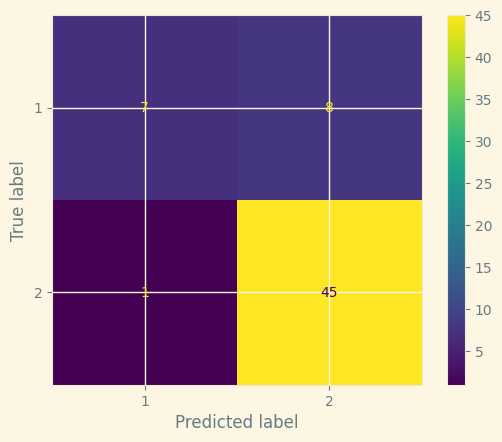

<Figure size 8000x8000 with 0 Axes>

In [114]:
# The model test report 
def report_model_test(models): 
    for name,model in models: 
        model.fit(X_train_scaled,y_train) 
        basem_preds = model.predict(X_test_scaled) 
        print(name) 
        print(classification_report(y_test,basem_preds))
        ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test) 
        plt.show() 
        plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(models) 

# Hyperparameter tuning using GridSearchCV

In [115]:
from sklearn.model_selection import GridSearchCV # importing GridSearchCV  

In [116]:
model = SVC()  # instiatiate the model 

In [117]:
grid_param = { 
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
    'penalty':['l1', 'l2', 'elasticnet', 'none'] 
} # declaring the parameter to tune with  

In [118]:
gd_lr = GridSearchCV(estimator=model, 
                     param_grid=grid_param, 
                     scoring='accuracy', 
                     cv=5, 
                     n_jobs=-1) # instantiating an object of GridSearchCV 

              precision    recall  f1-score   support

           1       1.00      0.13      0.24        15
           2       0.78      1.00      0.88        46

    accuracy                           0.79        61
   macro avg       0.89      0.57      0.56        61
weighted avg       0.83      0.79      0.72        61



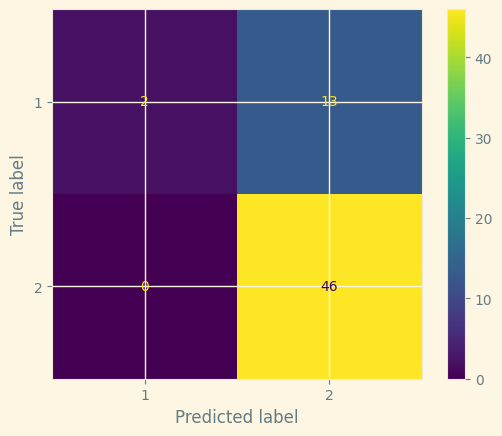

<Figure size 8000x8000 with 0 Axes>

In [119]:
# Training and evaluating the grid model 
def report_model_test(gd_lr): 
    model.fit(X_train_scaled,y_train) 
    basem_preds = model.predict(X_test_scaled)     
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(gd_lr) # using the gridsearch model to predict 

Tune all models and select the best that meet our target.


In [120]:
import joblib 
# Fit the model on training set 
model = LogisticRegression(penalty= 'none', solver= 'newton-cg') 
model.fit(X_train_scaled, y_train) 
# save the model to disk 
filename = 'finalized_model.sav' 
joblib.dump(model, filename) 

c:\users\sameb\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


['finalized_model.sav']

# Load the model from disk¶

              precision    recall  f1-score   support

           1       0.50      0.13      0.21        15
           2       0.77      0.96      0.85        46

    accuracy                           0.75        61
   macro avg       0.64      0.54      0.53        61
weighted avg       0.71      0.75      0.70        61



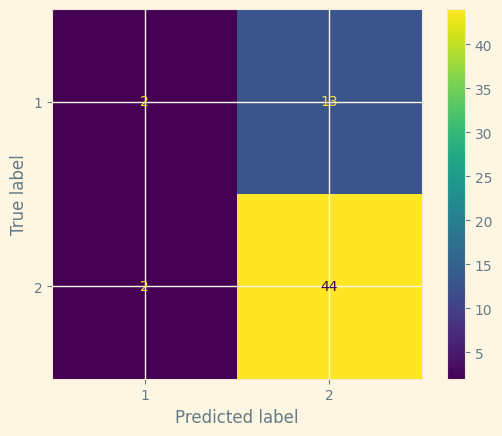

<Figure size 8000x8000 with 0 Axes>

In [121]:
loaded_model = joblib.load(filename) 
model = loaded_model 
 
# The model test report 
def report_model_test(model): 
     
    basem_preds = model.predict(X_test_scaled) 
           
    print(classification_report(y_test,basem_preds)) 
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test)
    plt.show() 
    plt.figure(figsize=(40,40), dpi = 200); 
     
     
report_model_test(model) 